<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/13_YOLO/YOLOv8_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

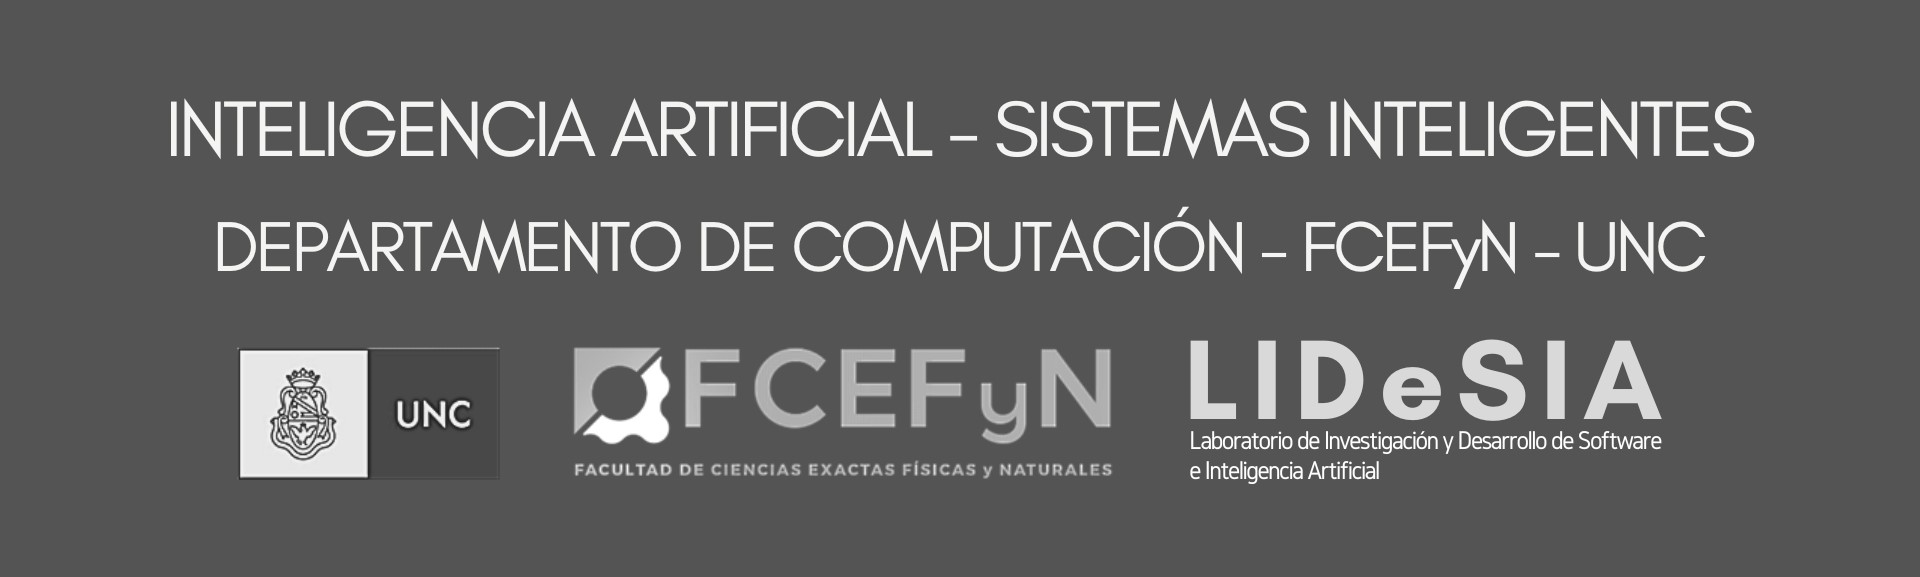

# YOLO
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Lourdes Aybar - Ing. Angel N. Heredia. (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---





# <center> IMPLEMENTACIÓN YOLOV8 </center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


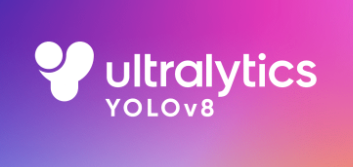

In [ ]:
from IPython.display import Image

ruta_imagen = '/content/drive/Shareddrives/Clase_IA/logo_YOLOv8.png'

# Muestra la imagen
Image(filename=ruta_imagen)

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 49.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Crear el modelo con los pesos pre-entrenados

model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 130MB/s]


In [ ]:
# Train the model

model.train(data='/content/drive/Shareddrives/Clase_IA/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/Shareddrives/Clase_IA/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

In [ ]:
# Cargamos el modelo con los pesos del entrenamiento
model_entrenado = YOLO('/content/runs/detect/train6/weights/best.pt')

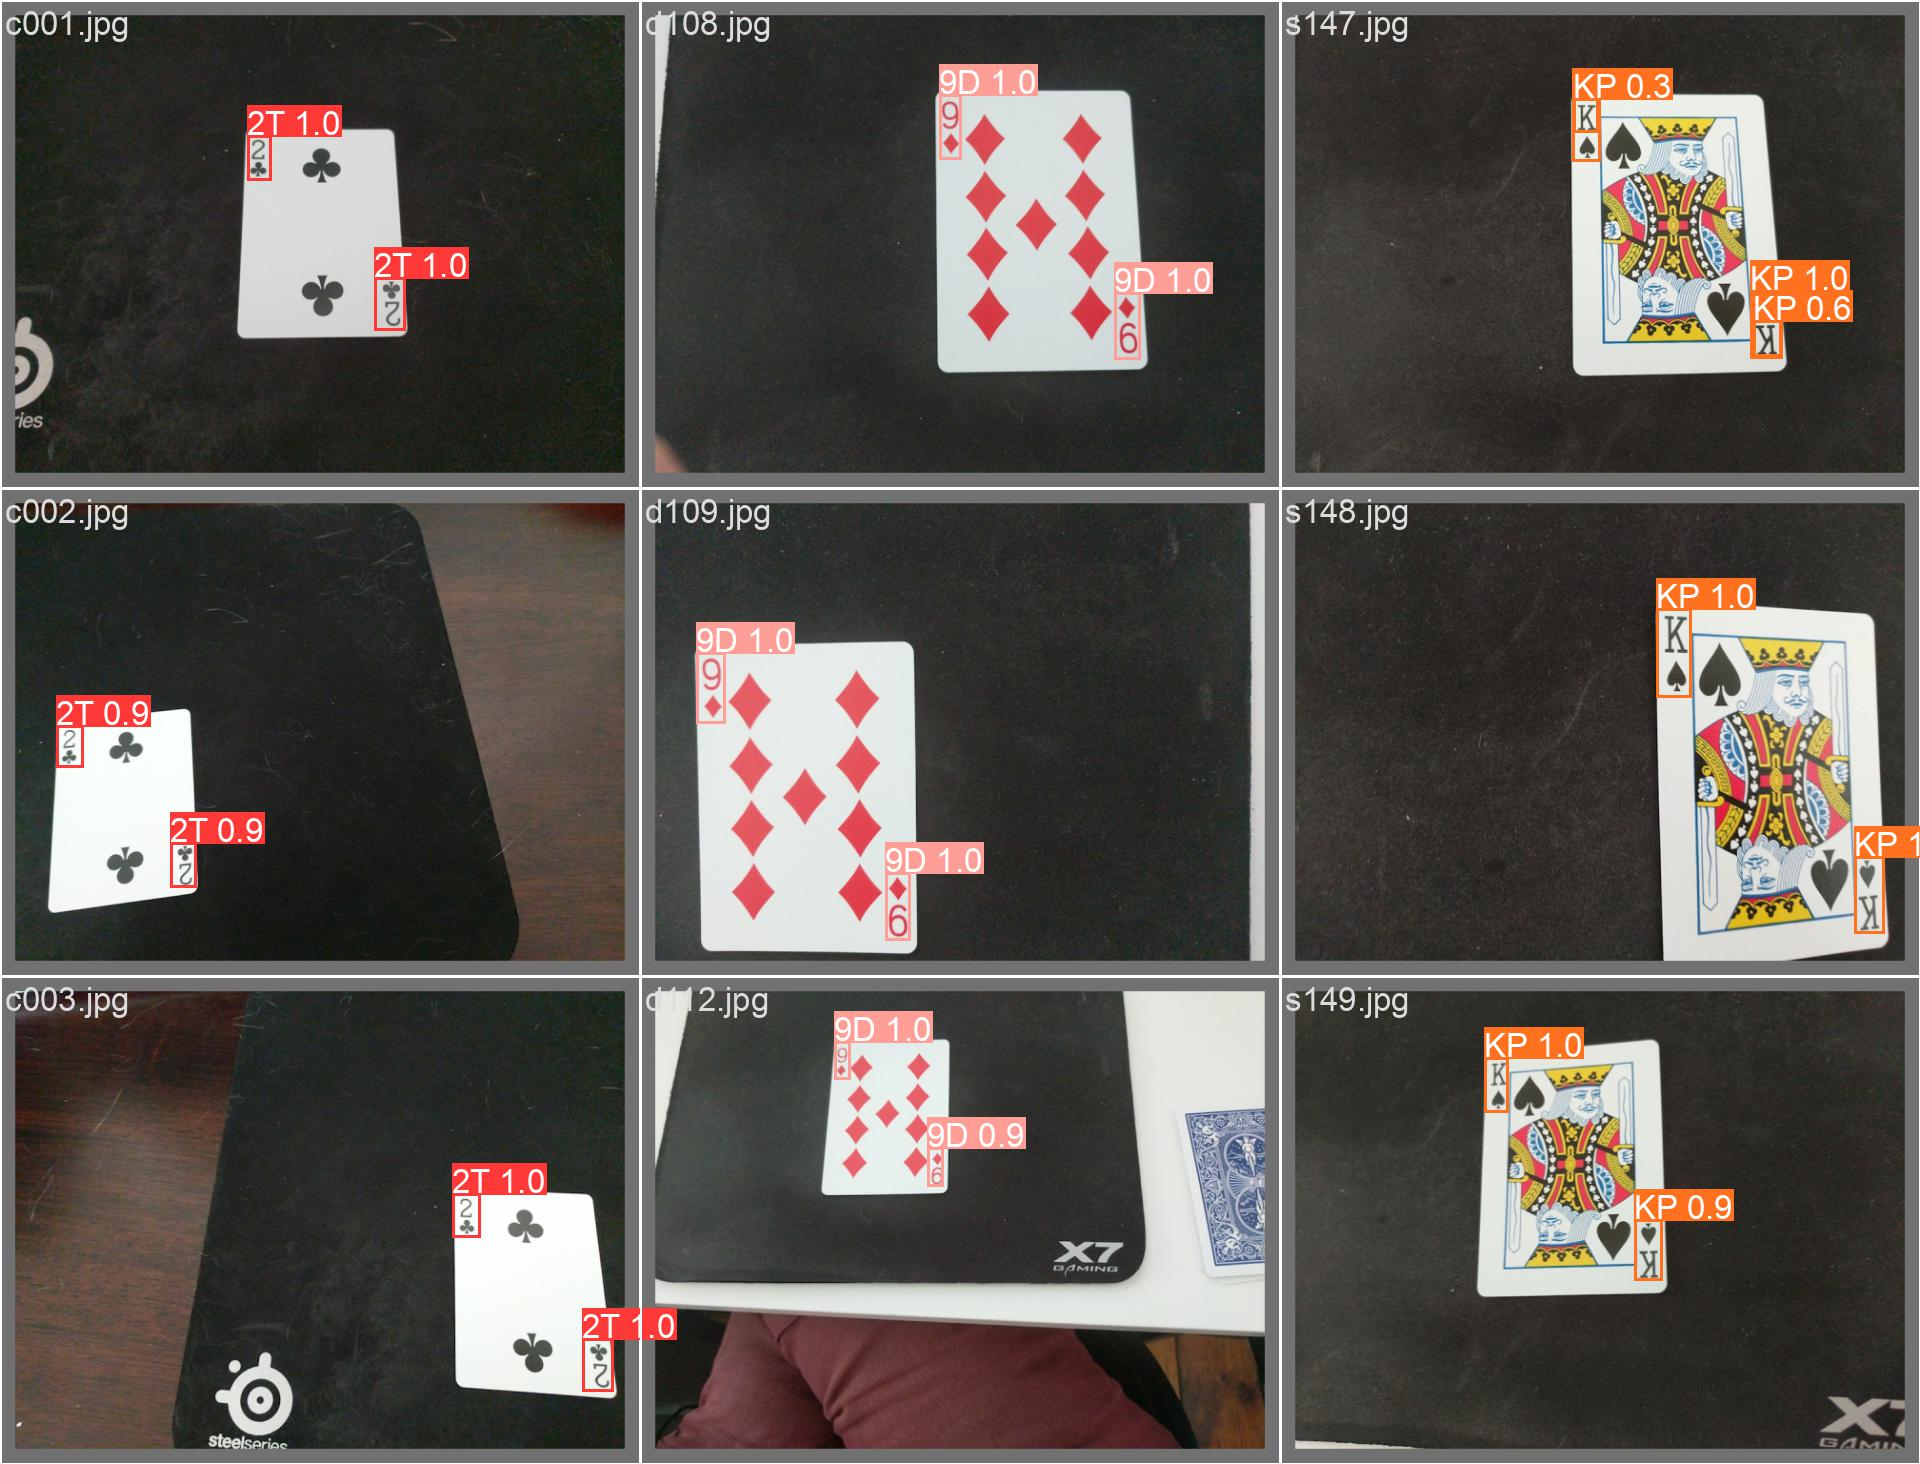

In [ ]:
# Predicciones en las imagenes de validación

ruta_img = '/content/runs/detect/train6/val_batch0_pred.jpg'

# Muestra la imagen
Image(filename=ruta_img)


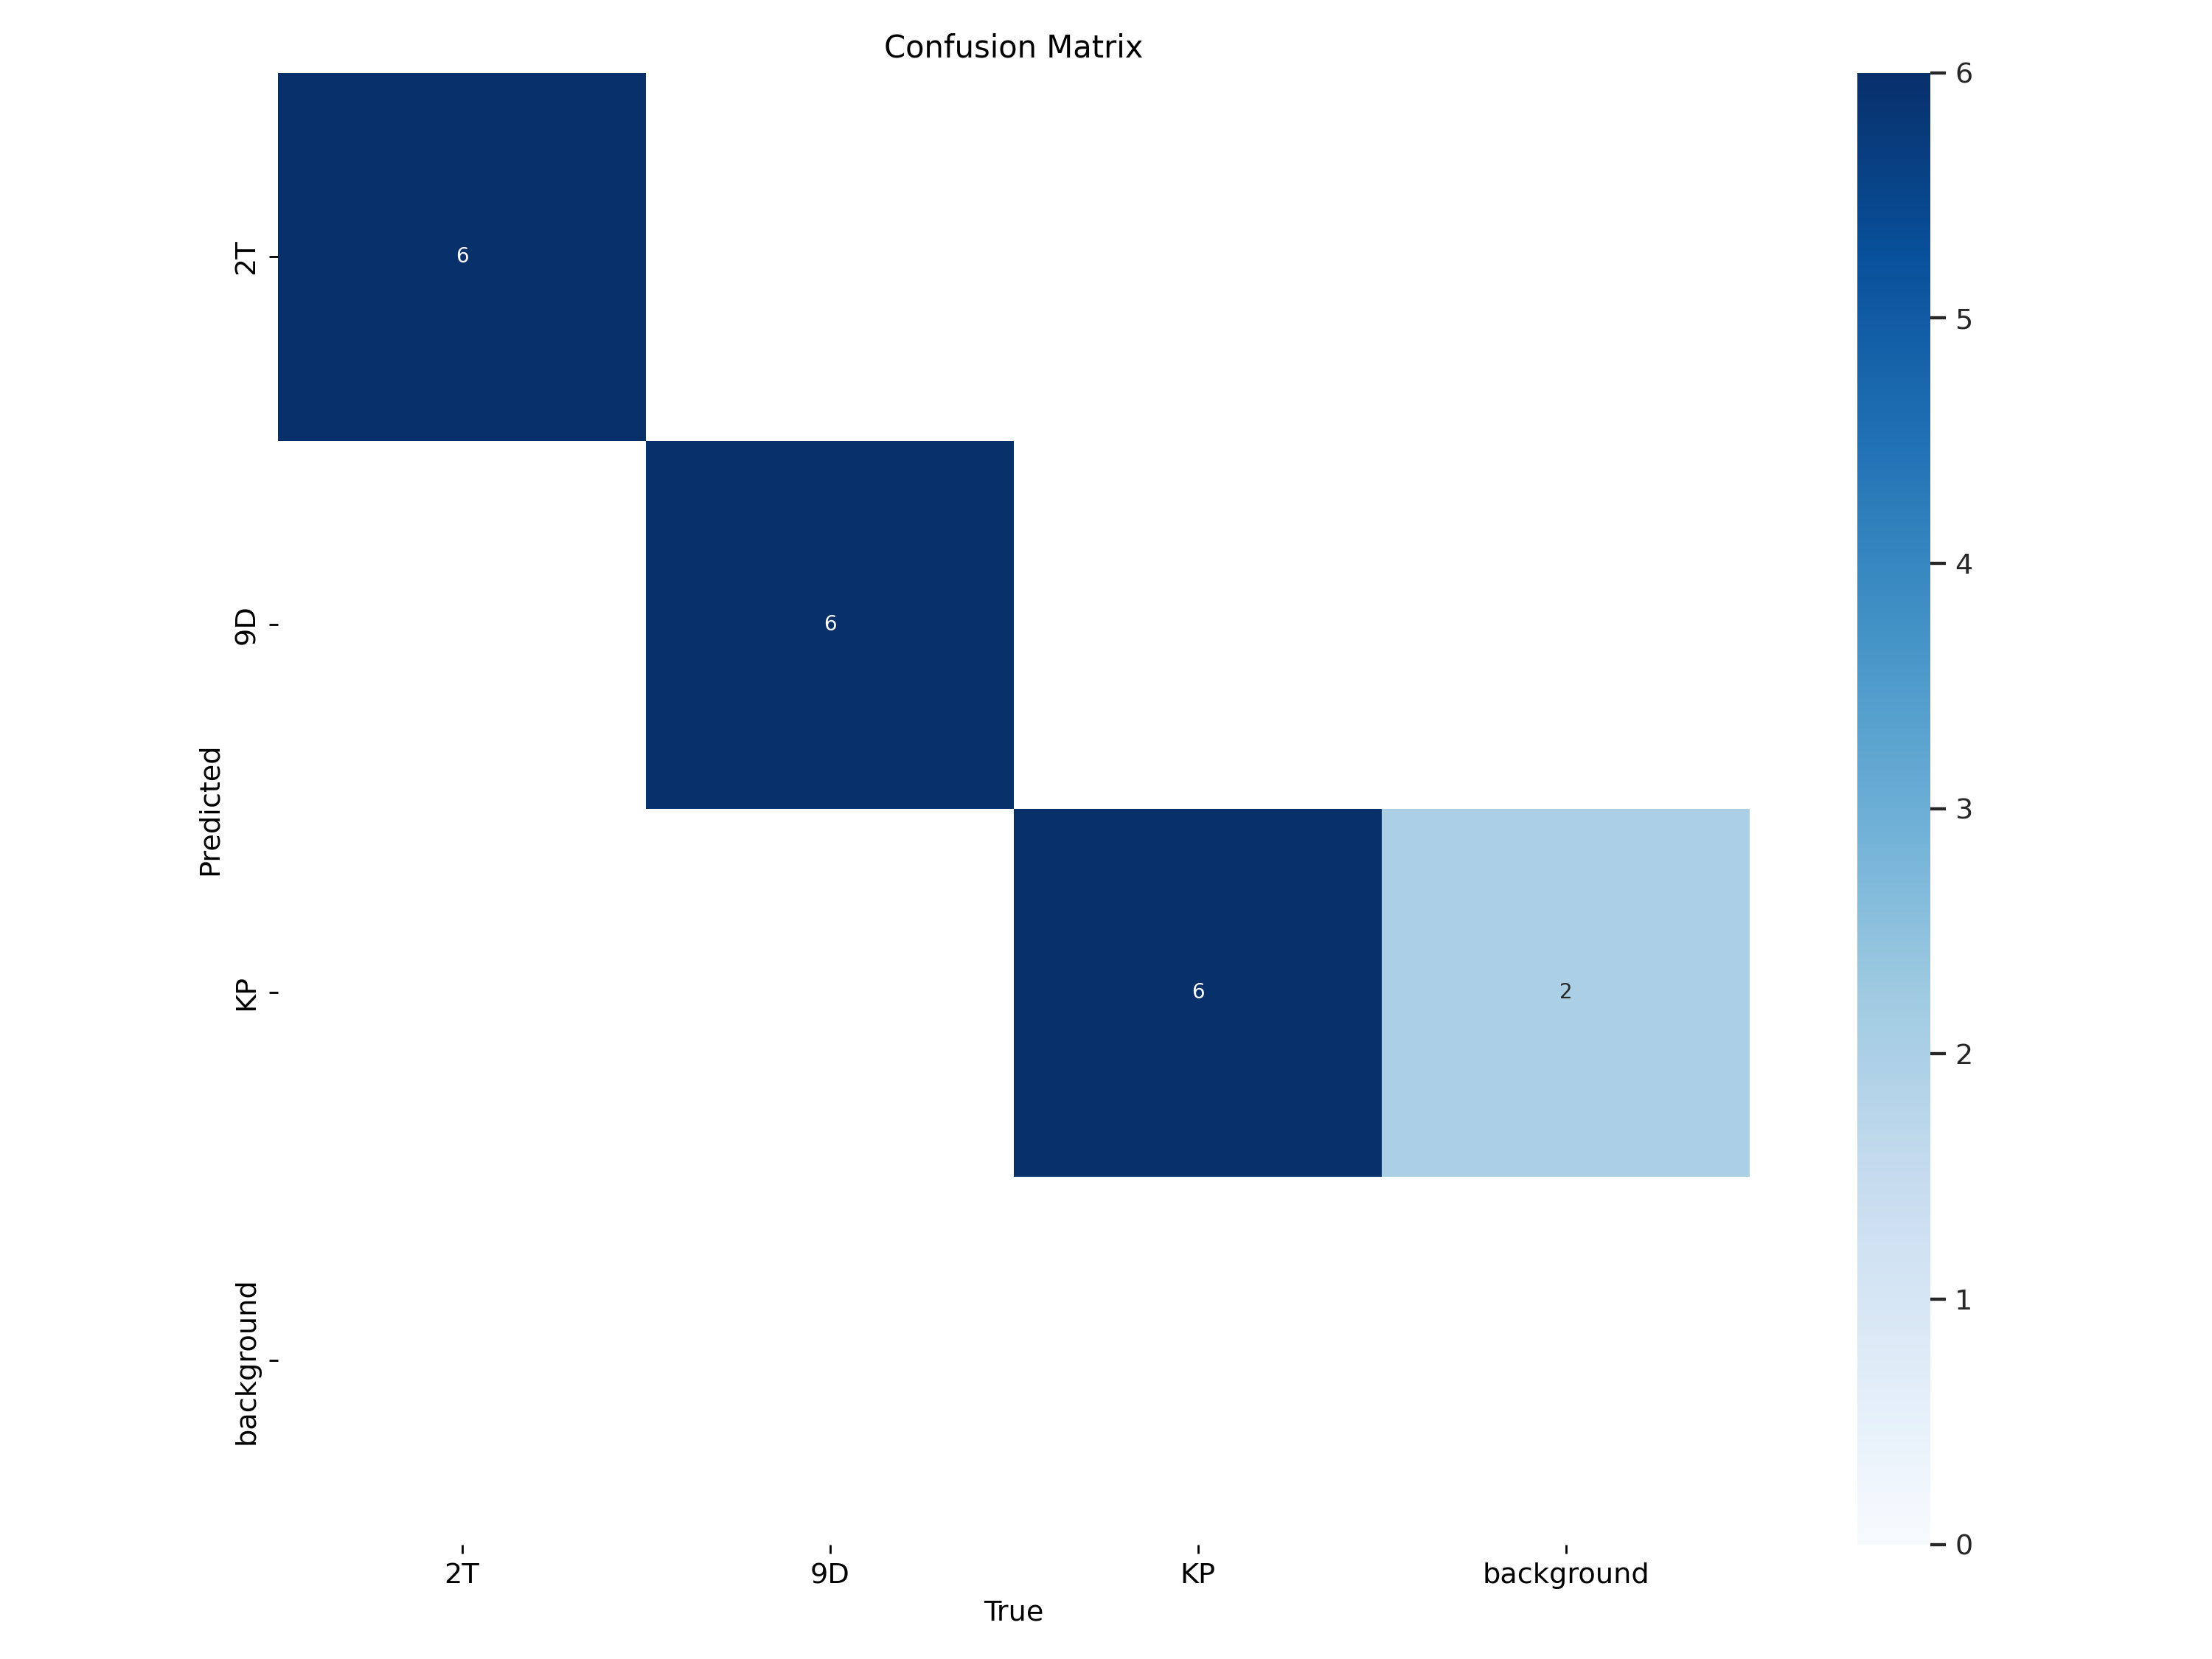

In [ ]:
# Matriz de confusión
ruta_img = '/content/runs/detect/train6/confusion_matrix.png'

# Muestra la imagen
Image(filename=ruta_img)


image 1/1 /content/drive/Shareddrives/Clase_IA/data/test/s161.jpg: 480x640 2 KPs, 28.2ms
Speed: 2.5ms preprocess, 28.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


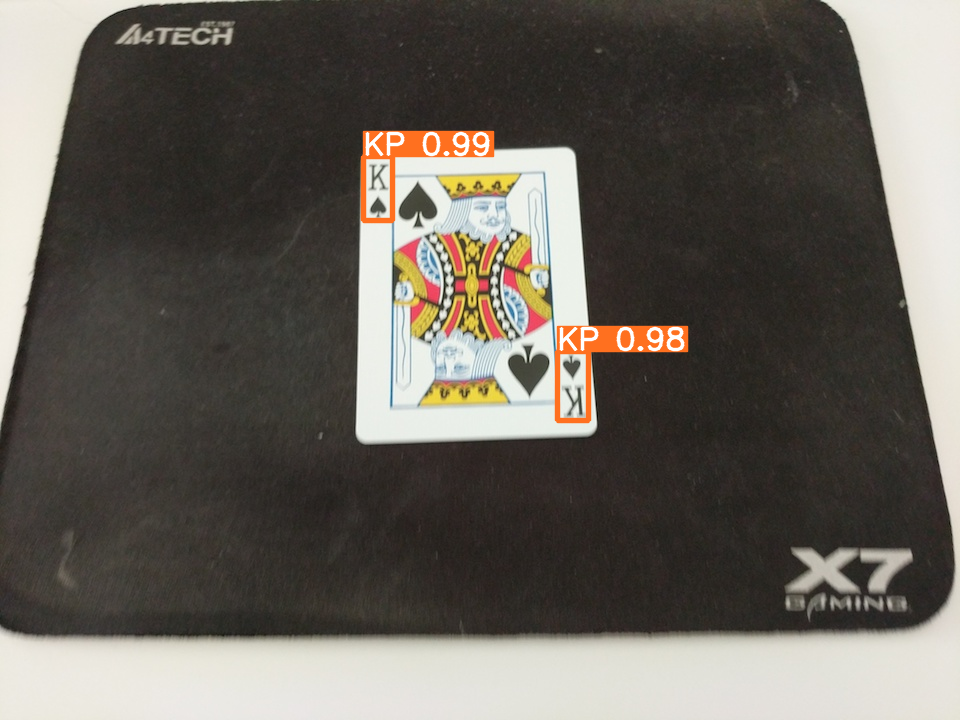

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Hacer una detección de una imagen desconocido
source = '/content/drive/Shareddrives/Clase_IA/data/test/s161.jpg'
resultado = model_entrenado.predict(source,
                                    save=True,
                                    imgsz=640,
                                    conf=0.7)

# Graficarla
res_plotted = resultado[0].plot()
cv2_imshow(res_plotted)